# Supervised Learning for Classification

In the previous chapters, we introduced the general Machine Learning pipeline and developed a detailed understanding of optimization techniques such as Gradient Descent and Stochastic Gradient Descent, applied in particular to **regression** problems. In regression, the goal is to predict a *continuous* quantity, such as the price of a house, the temperature of a city, or the value of a sensor measurement.

We now shift our focus to another fundamental branch of supervised learning: **classification**.

![](fig/classification_2.png)

## From Regression to Classification

In a **classification** problem, the objective is *not* to predict a continuous value, but instead to assign each input $x \in \mathbb{R}^d$ to one of a set of **discrete classes**. Typical examples include:

- Classifying emails as *spam* or *not spam*,
- Determining whether a medical image shows *healthy* tissue or a *tumor*,
- Recognizing handwritten digits (0–9),
- Predicting whether a customer will *buy* a product or *not*.

In the simplest case (that is, binary classification), we aim to predict whether a label $y$ belongs to one of two classes, which we will denote by

$$
y \in \{0, 1\}.
$$


This setup strongly resembles linear regression: we receive an input $x$ and produce an output $y = f_\Theta(x)$. However, while regression outputs a real number, classification requires a **probability** or a **discrete decision**.

For this reason, we will begin with a natural extension of linear regression to binary classification. The key idea is simple:

> We compute a linear prediction as in regression, then pass it through a **sigmoid function** to obtain a probability in $[0,1]$.

Formally,

$$
f_\Theta(x) := \sigma \left( \sum_{i=1}^n \Theta_i x_i \right) = \sigma(\Theta^T x),
$$

where

$$
\sigma(t) = \frac{1}{1 + e^{-t}}
$$

is the **sigmoid function**, which maps any real number to a value between 0 and 1. We interpret $f_\Theta(x)$ as the probability that $x$ is associated with the class $y = 1$, i.e.:

$$
\sigma(\Theta^T x) = \mathbb{P}(y=1 \mid x).
$$

Thus, we have transformed a linear regression model into a **probabilistic classifier**.

This model is known as **logistic regression**, and it represents the fundamental building block for modern binary classifiers, including neural networks and deep learning models.

Before deriving its training procedure, we first explore why the sigmoid is a good choice and how classification differs from regression in terms of modeling and objective functions.

![](fig/sigmoid.svg)

## The Sigmoid Function and Probabilistic Interpretation

To move from regression to classification, we need a mechanism that transforms a real-valued output into a probability. The **sigmoid function** plays this role perfectly as it maps any real number $t \in \mathbb{R}$ into the interval $(0,1)$, making it ideal for modeling probabilities.

### Why Sigmoid?

Consider a linear model (such as the one viewed in the previous chapter),

$$
z = \Theta^T x.
$$

Since $z$ can be negative or positive, we cannot interpret it directly as a probability. The sigmoid, however, has the following desirable properties:

- **Range:** $\sigma(t) \in (0,1)$, which makes it easy to interpret its output as a probability,
- **Monotonicity:** larger linear scores correspond to higher probabilities,
- **Smoothness:** continuously differentiable (needed for gradient methods),

### Logistic Model Interpretation

We interpret the model output as

$$
\sigma(\Theta^T x) = \mathbb{P}(y=1 \mid x;\Theta).
$$


The **decision rule** for binary classification becomes:

$$
\hat{y} = 
\begin{cases}
1 & \text{if } \sigma(\Theta^T x) \ge 0.5, \\
0 & \text{otherwise}.
\end{cases}
$$


This creates a **decision boundary** given by

$$
\Theta^T x = 0,
$$

which is a hyperplane, exactly as in linear regression, meaning logistic regression produces a **linear classifier**.

### Geometric Interpretation

The sign of the linear function determines the predicted class. The sigmoid simply “softens” this decision, providing a *probability* rather than a hard assignment.

Intuitively:

- If $\Theta^T x \gg 0$: high confidence in class 1  
- If $\Theta^T x \ll 0$: high confidence in class 0  
- If $\Theta^T x \approx 0$: uncertain prediction ($\approx$0.5 probability)

### Gradient of Sigmoid

To train the model via gradient methods, we need its derivative:

$$
\sigma'(t) = \sigma(t)(1 - \sigma(t)).
$$

This elegant form (a product of the output and its complement) explains why the sigmoid is extremely convenient for optimization.

## Binary Cross-Entropy Loss

Now that we model the probability of a sample belonging to class 1 as

$$
\hat{y} = \sigma(\Theta^T x),
\qquad 
\hat{y} \in (0,1),
$$

we need an appropriate loss function to measure how well the model matches the true labels.

Since classification outputs *probabilities*, the correct loss is derived from **maximum likelihood** and corresponds to the **binary cross-entropy** (also called logistic loss). Let $y \in \{0,1\}$ be the true label. We interpret the model as assigning the probability

$$
\mathbb{P}(y = 1 \mid x;\Theta) = \hat{y}, 
\qquad 
\mathbb{P}(y = 0 \mid x;\Theta) = 1 - \hat{y}.
$$

Thus, the likelihood of observing $y$ is

$$
\mathbb{P}(y \mid x;\Theta)
= \hat{y}^y \, (1 - \hat{y})^{(1-y)}.
$$

Maximizing the likelihood is equivalent to minimizing the **negative log-likelihood**:

$$
\ell(\Theta; x, y)
= - \left( y \log \hat{y} + (1 - y) \log (1 - \hat{y}) \right).
$$

Substituting $\hat{y} = f_\Theta(x) = \sigma(\Theta^T x)$, the **binary cross-entropy (BCE)** loss becomes

$$
\ell(\Theta; x, y)
= - \left(
y \log \sigma(\Theta^T x)
+ (1-y) \log \left(1 - \sigma(\Theta^T x)\right)
\right).
$$

For a dataset $(X,Y) = \{(x^{(i)}, y^{(i)})\}_{i=1}^N$, the empirical loss is therefore:

$$
\mathcal{L}(\Theta; X, Y)
= \frac{1}{N} \sum_{i=1}^N \ell(\Theta; x^{(i)}, y^{(i)}).
$$

### Why Cross-Entropy?

Cross-entropy is preferred over MSE for classification because:

- It directly measures **log-likelihood** (statistically principled),
- It penalizes confident wrong predictions more strongly,
- Its gradients remain informative even when $\sigma(\Theta^T x)$ saturates,
- Empirically, it leads to **much faster and more reliable training**.

You can think of BCE as telling the model:

> “Assign high probability to true labels and low probability to incorrect ones, and pay a high price if you are confidently wrong.”

### Gradient Derivation

We train the classification model with a variant of Stochastic Gradient Descent (SGD). To do that, we first need to derive the gradient needed for optimization. Recall that:

$$
\mathcal{L}(\Theta; X, Y) = \sum_{i=1}^N \ell (\Theta; x^{(i)}, y^{(i)}),
$$

and therefore:

$$
\nabla_\Theta \mathcal{L}(\Theta; X, Y) = \sum_{i=1}^N \nabla_\Theta \ell (\Theta; x^{(i)}, y^{(i)}),
$$

for which we only need to compute $\nabla_\Theta \ell (\Theta; x^{(i)}, y^{(i)})$ to run the SGD algorithm. To do that, let:

$$
\hat y = \sigma(z),\qquad z = \Theta^T x,\qquad 
\ell(\Theta; x,y) = -\Big[y\log \hat y + (1-y)\log(1-\hat y)\Big].
$$

We apply the chain rule:

$$
\nabla_\Theta \ell \;=\; \frac{\partial \ell}{\partial z}\,\frac{\partial z}{\partial \Theta}
\;=\; \frac{\partial \ell}{\partial z}\,x,
$$

since $\partial z/\partial \Theta = x$. Differentiating $\ell$ w.r.t. $z$:

$$
\frac{\partial \ell}{\partial z}
= -\left[
y \cdot \frac{1}{\hat y}\cdot \frac{\partial \hat y}{\partial z}
+ (1-y)\cdot \frac{-1}{1-\hat y}\cdot \frac{\partial \hat y}{\partial z}
\right]
= -\frac{\partial \hat y}{\partial z}
\left[
\frac{y}{\hat y} - \frac{1-y}{1-\hat y}
\right].
$$


Using that $\sigma'(z)=\hat y(1-\hat y)$, we have $\dfrac{\partial \hat y}{\partial z}=\hat y(1-\hat y)$. Substitute:

$$
\frac{\partial \ell}{\partial z}
= -\hat y(1-\hat y)\left[
\frac{y}{\hat y} - \frac{1-y}{1-\hat y}
\right].
$$


Simplify the bracket:

$$
\frac{y}{\hat y} - \frac{1-y}{1-\hat y}
= \frac{y(1-\hat y) - (1-y)\hat y}{\hat y(1-\hat y)}
= \frac{y - y\hat y - \hat y + y\hat y}{\hat y(1-\hat y)}
= \frac{y - \hat y}{\hat y(1-\hat y)}.
$$


Therefore,

$$
\frac{\partial \ell}{\partial z}
= -\hat y(1-\hat y)\cdot \frac{y - \hat y}{\hat y(1-\hat y)}
= -(y - \hat y)
= \hat y - y.
$$


Plugging back into the chain rule:

$$
\nabla_\Theta \ell(\Theta; x, y)
= \frac{\partial \ell}{\partial z}\,x
= (\hat y - y)\,x.
$$

Therefore, for any batch $\mathcal{M} \subseteq \{ X, Y \}$,

$$
\nabla_\Theta \mathcal{L}(\Theta; X, Y) = \sum_{i=1}^N (\sigma(\Theta^T x^{(i)}) - y^{(i)})\,x^{(i)}.
$$

This is **very convenient**:
- It has the same form as linear regression,
- Only the error term changes: $\hat{y}^{(i)} - y^{(i)}$,
- The sigmoid derivative magically cancels during simplification.

Thus, the SGD / GD update rule becomes

$$
\Theta^{(k+1)} = \Theta^{(k)} - \eta_k\,(\sigma(\Theta^{(k), T} x^{(i)}) - y^{(i)})\,x^{(i)}.
$$


This simplicity is one reason logistic regression remains foundational.

### Interpretation of the Gradient

- If the model predicts a probability **too high** for label 1, it pushes $\Theta$ **down**.
- If the probability is **too low**, it pushes $\Theta$ **up**.
- The update magnitude depends on the **confidence error** and the **input**.

Logistic regression is thus **a smooth, probabilistic, differentiable extension of linear classification**.

## Evaluating Classification Models

In regression we measured performance using metrics such as Mean Squared Error. For classification, the target is no longer a real number, but a **category**, so evaluation metrics must reflect **decision quality**, not numerical closeness.

### The Confusion Matrix

Given binary labels $y \in \{0,1\}$ and predictions $\hat{y} \in \{0,1\}$, we define:

| Actual \ Predicted | 1 (Positive) | 0 (Negative) |
|--------------------|--------------|--------------|
| **1 (Positive)**   | True Positive (TP) | False Negative (FN) |
| **0 (Negative)**   | False Positive (FP) | True Negative (TN) |

These four numbers form the **confusion matrix** and are the basis for all metrics below.

### Accuracy

$$
\text{Acc}
= \frac{\text{TP} + \text{TN}}{\text{TP + TN + FP + FN}}
$$

Accuracy answers: *"What fraction of total predictions are correct?"*

**Limitation:** Alone, it can be misleading when classes are very unbalanced  
(e.g., always predicting “0” in a dataset that is 99% zeros gives 99% accuracy, but is useless).  
*(We ignore class imbalance handling for now, but this explains why accuracy is often not enough.)*

### Precision and Recall

Precision:

$$
\text{Precision}
= \frac{\text{TP}}{\text{TP + FP}}
$$

*"Of the samples predicted as positive, how many are actually positive?"*

Recall (a.k.a. True Positive Rate):

$$
\text{Recall}
= \frac{\text{TP}}{\text{TP + FN}}
$$

*"Of all positive samples, how many did we correctly detect?"*

Different applications emphasize different metrics:

- Spam detection: **High precision** (avoid marking real emails as spam)
- Disease screening: **High recall** (catch as many sick patients as possible)

### F1 Score

The **harmonic mean** of precision and recall:

$$
F_1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}
{\text{Precision} + \text{Recall}}
$$


Useful when you need a single number summarizing both precision and recall.

### Implementation Exercise: Evaluate Logistic Regression

After training your logistic regression model via SGD:

1. Compute $\hat{y} = \sigma(\Theta^T x)$
2. Convert to predictions $\hat{y} \in \{0,1\}$ using a threshold (start with 0.5)
3. Compute:
   - Confusion matrix
   - Accuracy
   - Precision, Recall, F1

## Example: Logistic Regression on a Real Dataset

To conclude this chapter, we train a logistic regression model **from scratch (`numpy` only)** on a real classification dataset from Kaggle:

**Pima Indians Diabetes Database**: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

This dataset contains medical measurements for female patients and a binary label indicating whether diabetes was diagnosed. Similarly to what we previously did for regression, we will:

- Load the dataset
- Standardize features
- Train logistic regression with SGD
- Evaluate accuracy

### Load and Prepare Data

In [56]:
import numpy as np
import pandas as pd

# Download `diabetes.csv` from Kaggle and place it in notebook directory
df = pd.read_csv("data/diabetes.csv")

X = df.drop("Outcome", axis=1).values   # features
y = df["Outcome"].values.reshape(-1,1)  # labels

# Standardize features
X_mean, X_std = X.mean(axis=0), X.std(axis=0)
X = (X - X_mean) / X_std

# Add bias term
X = np.hstack([np.ones((X.shape[0],1)), X])
N, d = X.shape

### Logistic Regression (SGD Training)

In [57]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def l(theta, X, y):
    p = sigmoid(X @ theta)
    return -(y*np.log(p) + (1-y)*np.log(1-p)).mean()

def grad_l(theta, X, y):
    return (X.T @ (sigmoid(X @ theta) - y)) / len(y)

def accuracy(theta, X, y):
    preds = sigmoid(X @ theta) >= 0.5
    return (preds == y).mean()

def train_sgd(l, grad_l, X, y, lr=0.1, epochs=200, batch_size=32):
    N, d = X.shape
    theta = np.zeros((d, 1))
    losses, accs = [], []

    for epoch in range(epochs):
        # Shuffle data
        idx = np.arange(len(X))
        np.random.shuffle(idx)

        X = X[idx, :]
        y = y[idx]

        for batch in range(0, N, batch_size):
            grad = grad_l(theta, 
                             X[batch:batch + batch_size, :],
                             y[batch:batch + batch_size, :])
            theta -= lr * grad

        # Log full-dataset metrics after the epoch
        losses.append(l(theta, X, y))
        accs.append(accuracy(theta, X, y))

    return theta, np.array(losses), np.array(accs)

theta_sgd, loss_sgd, acc_sgd = train_sgd(l, grad_l, X, y, 
                                         lr=1e-3, epochs=200, batch_size=32)
print(f"SGD accuracy: {acc_sgd[-1]*100:.2f}%")

SGD accuracy: 76.43%


### Adam Training

In [58]:
def train_adam(l, grad_l, X, y, lr=1e-3, epochs=200, batch_size=32, 
beta1=0.9, beta2=0.999, eps=1e-8, 
):
    N, d = X.shape
    theta = np.zeros((d, 1))
    m = np.zeros_like(theta)
    v = np.zeros_like(theta)
    t = 0

    losses, accs = [], []

    for epoch in range(epochs):
        # Shuffle data
        idx = np.arange(len(X))
        np.random.shuffle(idx)

        X = X[idx, :]
        y = y[idx]
        for batch in range(0, N, batch_size):
            g = grad_l(theta, X[batch:batch + batch_size], y[batch:batch + batch_size])

            t += 1
            m = beta1 * m + (1 - beta1) * g
            v = beta2 * v + (1 - beta2) * (g * g)
            m_hat = m / (1 - beta1 ** t)
            v_hat = v / (1 - beta2 ** t)

            theta -= lr * (m_hat / (np.sqrt(v_hat) + eps))

        # Log full-dataset metrics after the epoch
        losses.append(l(theta, X, y))
        accs.append(accuracy(theta, X, y))

    return theta, np.array(losses), np.array(accs)

theta_adam, loss_adam, acc_adam = train_adam(l, grad_l, X, y, 
                                             lr=1e-3, epochs=200, batch_size=32)
print(f"Adam accuracy: {acc_adam[-1]*100:.2f}%")

Adam accuracy: 78.12%


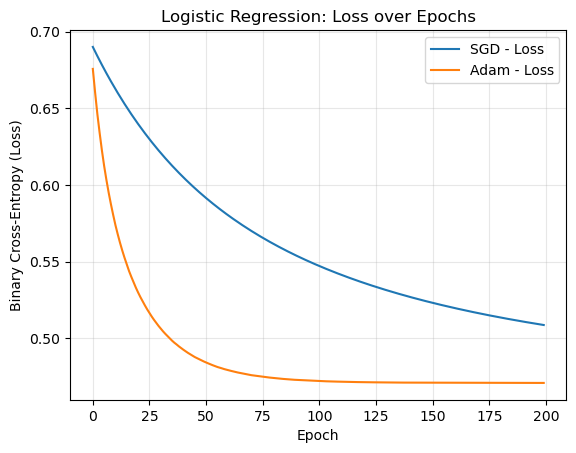

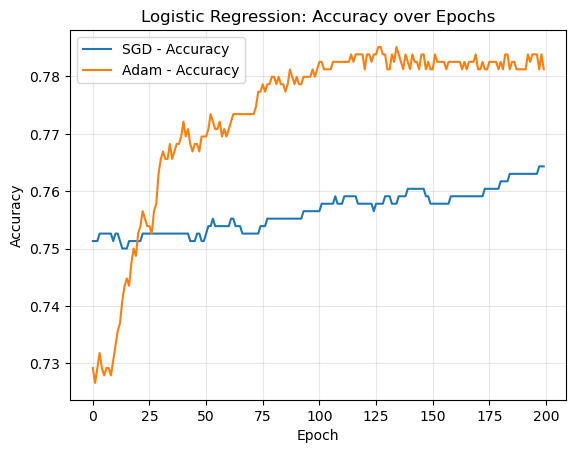

In [59]:
import matplotlib.pyplot as plt

# Plot loss
plt.figure()
plt.plot(loss_sgd, label="SGD - Loss")
plt.plot(loss_adam, label="Adam - Loss")
plt.xlabel("Epoch")
plt.ylabel("Binary Cross-Entropy (Loss)")
plt.title("Logistic Regression: Loss over Epochs")
plt.grid(alpha=0.3)
plt.legend()
plt.show()

# Plot accuracy
plt.figure()
plt.plot(acc_sgd, label="SGD - Accuracy")
plt.plot(acc_adam, label="Adam - Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Logistic Regression: Accuracy over Epochs")
plt.grid(alpha=0.3)
plt.legend()
plt.show()

## From Logistic Regression to a Simple Neural Network

![](fig/NN.png)

Up to this point, our models have been **linear**: for both regression and classification we always computed a single linear score of the form

$$
z = \Theta^T x,
\qquad
\hat y = \sigma(z),
$$

and then trained the parameters by minimizing an appropriate loss. This is the core of **logistic regression**, and as we have seen, it already performs surprisingly well. However, a single linear transformation can only separate data that is linearly separable.  
In other words, logistic regression can only learn **linear decision boundaries**. But what if the true relationship between the input and the output is more complex? For example, what if the classes lie on *curved* or *intertwined* regions of space? This motivates the next step: **neural networks**.

### Adding a Hidden Layer

The idea behind neural networks is very simple:

> Instead of directly mapping input features to an output, we first transform the inputs into a richer representation, and then we make predictions based on that representation.

We do this by inserting a **hidden layer**. Concretely, we take our input $x$, apply a **linear map**, then a **nonlinear activation function**, and use the resulting features to make the final prediction. Mathematically, instead of

$$
\hat y = \sigma(\Theta^T x),
$$

we compute

$$
\begin{aligned}
z_1 &= W_1 x + b_1,\\
a_1 &= \mathrm{ReLU}(z_1),\\
z_2 &= W_2 a_1 + b_2,\\
\hat y &= \sigma(z_2),
\end{aligned}
$$

where:
- $W_1, b_1$ are the parameters of the **hidden layer**,
- $W_2, b_2$ are the parameters of the **output (logistic) layer**,
- $\mathrm{ReLU}(t) = \max(0, t)$ introduces **nonlinearity**.

This model can now learn **non-linear decision boundaries**, because the ReLU transformation can bend and reshape the input space before classification happens.

Notice how intuitive this is: the ReLU layer is learning new features automatically, instead of us hand-engineering them.

### Training the Network: The Chain Rule in Action

Even though the model is more complex, the training principle remains unchanged:

> we compute the loss, and then adjust the parameters to reduce it.

The key difference is that we now have more parameters and a composition of functions. Luckily, differentiation rules scale perfectly: we simply apply the **chain rule** layer by layer. This process, known as **backpropagation**, is nothing more than repeatedly applying:

$$
\frac{d}{dx} f(g(x)) = f'(g(x)) \cdot g'(x).
$$

The ReLU nonlinearity also has a very simple derivative:

$$
\mathrm{ReLU}'(z) =
\begin{cases}
1, & z > 0,\\
0, & z \le 0.
\end{cases}
$$

During backpropagation, this means that gradients are allowed to “flow” only through neurons that were active (i.e., had positive input). Neurons that had negative inputs simply do not contribute.

This simple idea already allows us to build a universal function approximator: a network with only one hidden layer can theoretically approximate **any continuous function**, provided we use enough hidden units.

Of course, in practice, deeper networks tend to learn more effectively but that is the story for coming courses.

### Implementation From Scratch

Below is a compact, fully-vectorized implementation of a one-hidden-layer neural network for binary classification.

This code:

- Computes the forward pass,
- Computes all gradients manually using the chain rule,
- Applies SGD updates,
- Logs training loss and accuracy.

You will recognize the familiar structure from logistic regression, just with one more layer.

In [60]:
import numpy as np

def sigmoid(z):
    return np.where(z >= 0, 1/(1+np.exp(-z)), np.exp(z)/(1+np.exp(z)))

def relu(z):
    return np.maximum(0, z)

def relu_grad(z):
    g = np.zeros_like(z)
    g[z > 0] = 1.0
    return g

def train_mlp_adam(X, y, hidden=16, lr=1e-2, epochs=200, batch_size=32):
    N, d = X.shape

    W1 = np.random.normal(0, np.sqrt(2/d), size=(d, hidden))
    b1 = np.zeros((1, hidden))
    W2 = np.random.normal(0, np.sqrt(2/hidden), size=(hidden, 1))
    b2 = np.zeros((1, 1))

    losses, accs = [], []

    for _ in range(epochs):
        # Shuffle data
        idx = np.arange(len(X))
        np.random.shuffle(idx)

        X = X[idx, :]
        y = y[idx]

        for batch in range(0, N, batch_size):
            Xb, yb = X[batch:batch+batch_size], y[batch:batch+batch_size]

            # forward
            z1 = Xb @ W1 + b1
            a1 = relu(z1)
            z2 = a1 @ W2 + b2
            y_hat = sigmoid(z2)

            # backward
            delta2 = (y_hat - yb) / len(yb)
            dW2 = a1.T @ delta2
            db2 = delta2.sum(axis=0, keepdims=True)

            delta1 = (delta2 @ W2.T) * relu_grad(z1)
            dW1 = Xb.T @ delta1
            db1 = delta1.sum(axis=0, keepdims=True)

            # update
            W1 -= lr * dW1
            b1 -= lr * db1
            W2 -= lr * dW2
            b2 -= lr * db2

        # track
        z1 = X @ W1 + b1
        a1 = relu(z1)
        z2 = a1 @ W2 + b2
        yhat_full = sigmoid(z2)

        losses.append(bce_loss(yhat_full, y))
        preds = (yhat_full >= 0.5).astype(int)
        accs.append((preds == y).mean())

    return (W1, b1, W2, b2), np.array(losses), np.array(accs)

theta_nn_sgd, loss_nn_sgd, acc_nn_sgd = train_mlp_adam(
    X, y,
    hidden=16,       
    lr=1e-3,
    epochs=200,
    batch_size=32,
)
print(f"Neural Network final accuracy: {acc_nn[-1]*100:.2f}%")

Neural Network final accuracy: 79.17%


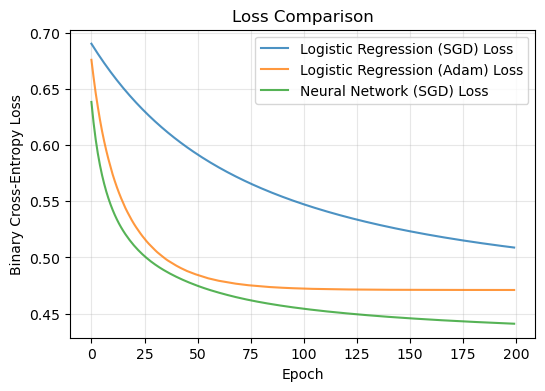

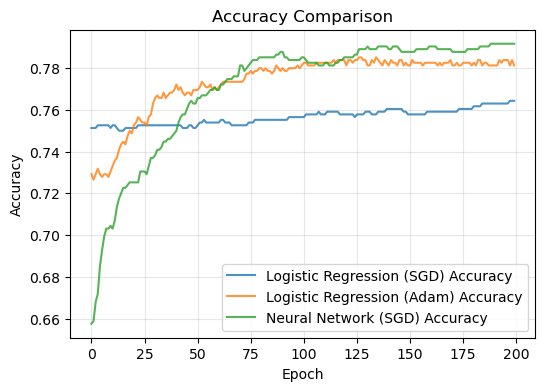

In [61]:
# Plot Loss Curves
plt.figure(figsize=(6,4))
plt.plot(loss_sgd, label="Logistic Regression (SGD) Loss", alpha=0.8)
plt.plot(loss_adam, label="Logistic Regression (Adam) Loss", alpha=0.8)
plt.plot(loss_nn, label="Neural Network (SGD) Loss", alpha=0.8)
plt.xlabel("Epoch")
plt.ylabel("Binary Cross-Entropy Loss")
plt.title("Loss Comparison")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Plot Accuracy Curves
plt.figure(figsize=(6,4))
plt.plot(acc_sgd, label="Logistic Regression (SGD) Accuracy", alpha=0.8)
plt.plot(acc_adam, label="Logistic Regression (Adam) Accuracy", alpha=0.8)
plt.plot(acc_nn, label="Neural Network (SGD) Accuracy", alpha=0.8)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### Final Remarks

What we have built here is the simplest possible neural network. Yet, conceptually, it already contains **all the essential ingredients of deep learning**:

- Stacking linear transformations,
- Inserting nonlinearities,
- Applying the chain rule backwards through the model,
- Updating parameters via gradient-based optimization.

Everything you may have heard about, such as convolutional networks, transformers, diffusion models, LLMs, is built on top of this same foundation.

By making the jump from logistic regression to a one-hidden-layer network, we now start seeing how machines can **learn powerful, nonlinear patterns** from data, instead of relying on manually engineered features. From here, we will continue increasing expressivity, depth, and scalability, always guided by the same core mathematical principles introduced in this course.